<a href="https://colab.research.google.com/github/lukasz86s/convolutional_neural_network/blob/main/functional_api_keras_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

from google.colab.patches import cv2_imshow


#Import data


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


#Build model

In [3]:

layer_in = layers.Input(shape=(28, 28, 1))
conv_layer = layers.Conv2D(filters=28, kernel_size=2, padding='same', activation='relu')(layer_in)
drop_layer = layers.Dropout(0.1)(conv_layer)
conv_layer = layers.Conv2D(filters=28, kernel_size=2, padding='same', activation='relu')(drop_layer)
flatten_layer = layers.Flatten()(conv_layer)
out_layer  = layers.Dense(units=10, activation='softmax')(flatten_layer)

model = models.Model(layer_in, out_layer)
model_2 = models.Model(layer_in, out_layer)

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',])


#Model summary

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 28)        140       
                                                                 
 dropout (Dropout)           (None, 28, 28, 28)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 28)        3164      
                                                                 
 flatten (Flatten)           (None, 21952)             0         
                                                                 
 dense (Dense)               (None, 10)                219530    
                                                                 
Total params: 222,834
Trainable params: 222,834
Non-trainable

#Train model

In [6]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y_train)
y.shape

(60000, 10)

In [7]:
model.fit(X_train, y, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 56s 37ms/step - loss: 0.4482 - accuracy: 0.9274 - val_loss: 0.1138 - val_accuracy: 0.9677
Epoch 2/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.0957 - accuracy: 0.9713 - val_loss: 0.1060 - val_accuracy: 0.9689
Epoch 3/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0609 - accuracy: 0.9806 - val_loss: 0.1269 - val_accuracy: 0.9676
Epoch 4/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0463 - accuracy: 0.9847 - val_loss: 0.1209 - val_accuracy: 0.9722
Epoch 5/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0364 - accuracy: 0.9885 - val_loss: 0.1070 - val_accuracy: 0.9729
Epoch 6/10
1500/1500 [==============================] - 47s 31ms/step - loss: 0.0319 - accuracy: 0.9890 - val_loss: 0.1221 - val_accuracy: 0.9730
Epoch 7/10
1500/1500 [==============================] - 47s 31ms/step - loss: 0.0254 - accuracy: 0.9920 - val_loss: 0.1317 -

#predict test data

In [8]:
pred = model.predict(X_test)

In [11]:
df = pd.DataFrame()
df['pred'] = pred.argmax(axis=1)
df['y_true'] = y_test
df

,pred,y_true
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [26]:
#get errors indexes
(error, ) = np.where(df['pred'] != df['y_true'])

In [31]:
print("procentage correctly predicted", 100. -(100.0 * error.shape[0] / y_test.shape[0]), "%")

procentage correctly predicted 97.47 %


#Show random error predict


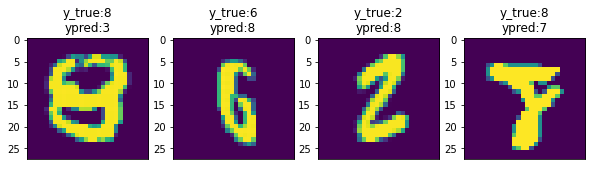

In [32]:
fig, ax = plt.subplots(1,4)
fig.set_size_inches((10,10))

for i in range(0,4):
  rand_idx = np.random.choice(error)
  ax[i].imshow(X_test[rand_idx])
  ax[i].set_title(f"y_true:{df.iloc[rand_idx][1]}\nypred:{df.iloc[rand_idx][0]}")
  ax[i].xaxis.set_visible(False)
plt.show()